This project was made by:
- [Erik Soares](https://github.com/eriksoaress)
- [Matheus Aguiar](https://github.com/C0D8)
- [João Alfredo](https://github.com/alfredjynx)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [3]:
df = pd.read_csv('data/loan_approval/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Log-transform skewed numerical features to handle outliers and improve visualization
df['person_income_log'] = np.log(df['person_income'])
df['loan_amnt_log'] = np.log(df['loan_amnt'])

df = df.drop(columns=['person_income', 'loan_amnt'])

In [5]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns
categorial_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns::")
print(categorial_columns)

Numerical Columns:
['person_age', 'person_emp_exp', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'person_income_log', 'loan_amnt_log']

Categorical Columns::
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


## Data Distributions

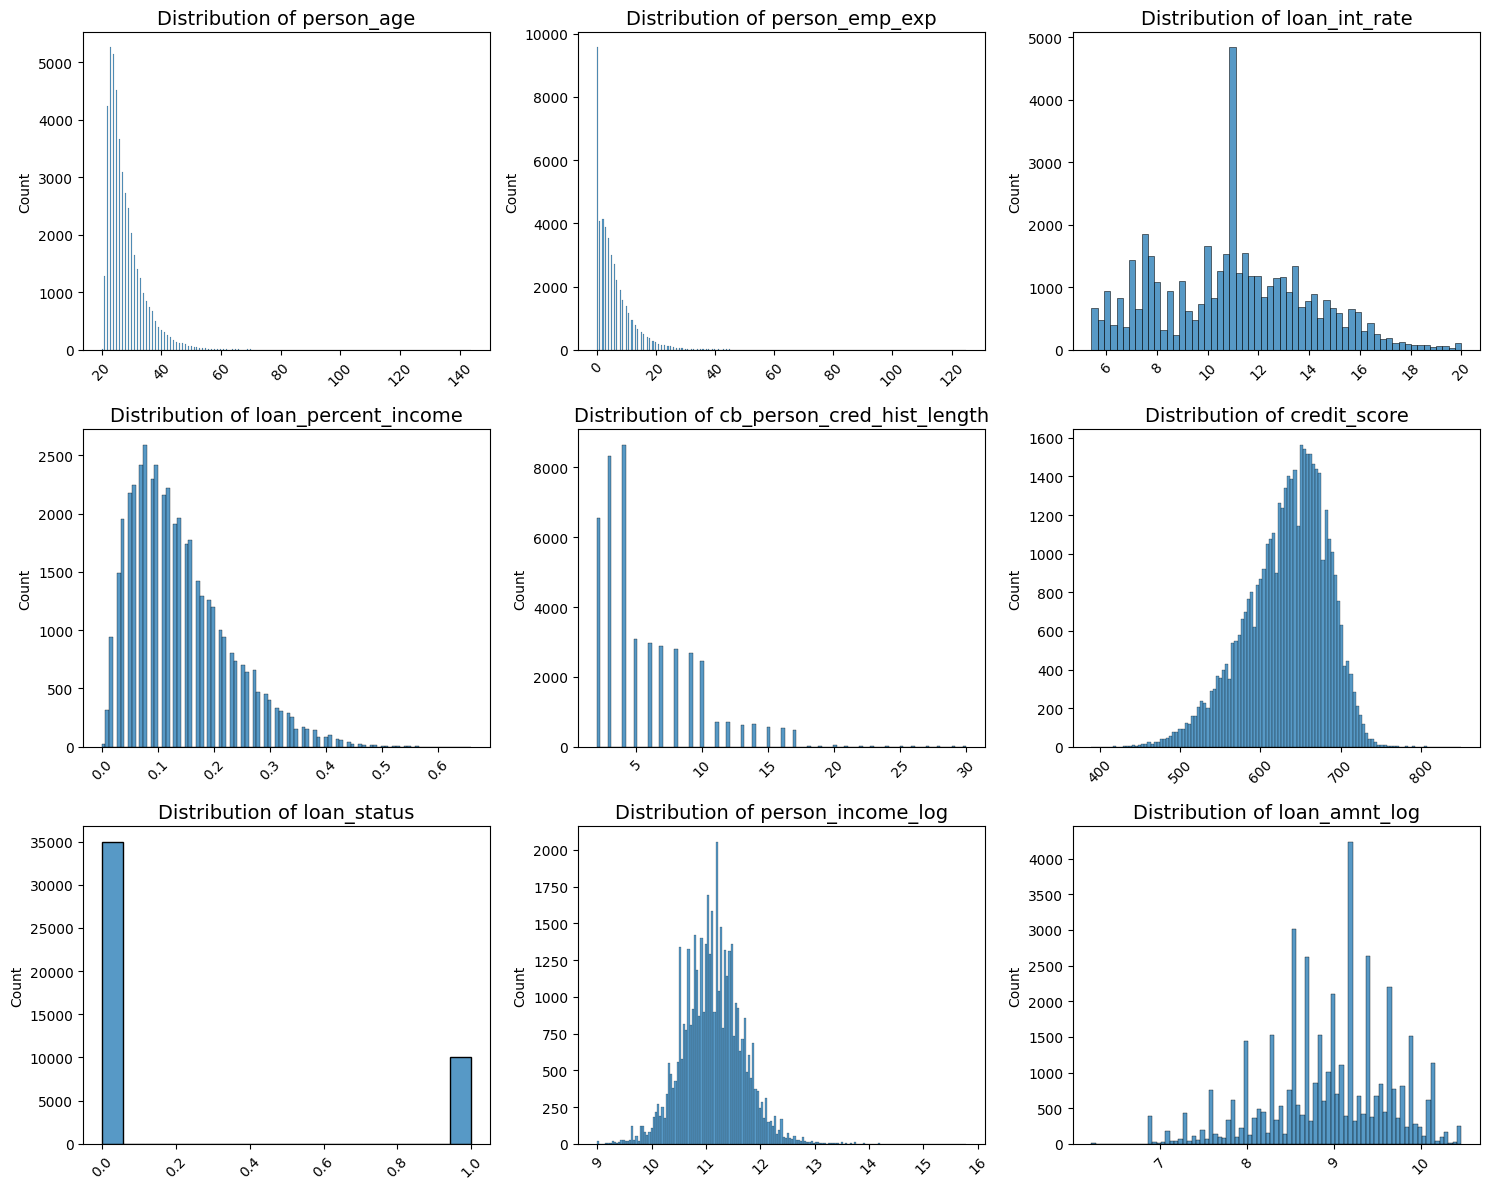

In [6]:
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Iterate over each numerical column and plot its histogram on a subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

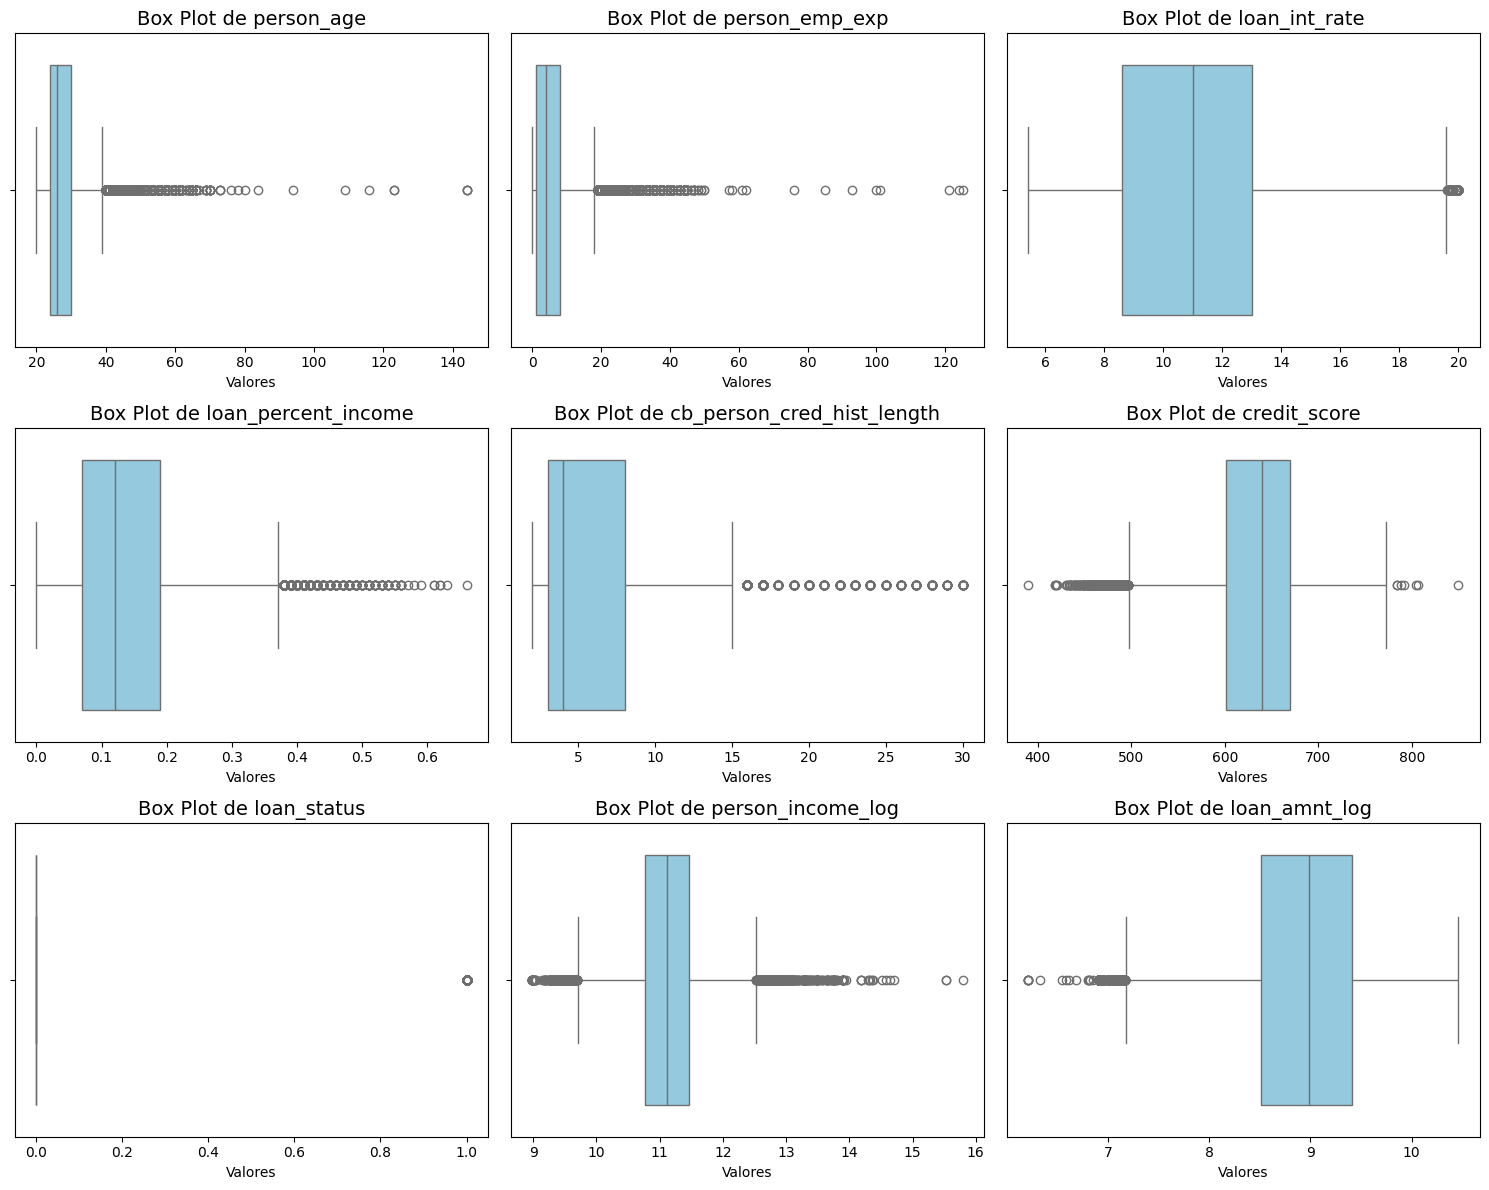

In [7]:
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue') 
    
    axes[i].set_title(f'Box Plot de {col}', fontsize=14)
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

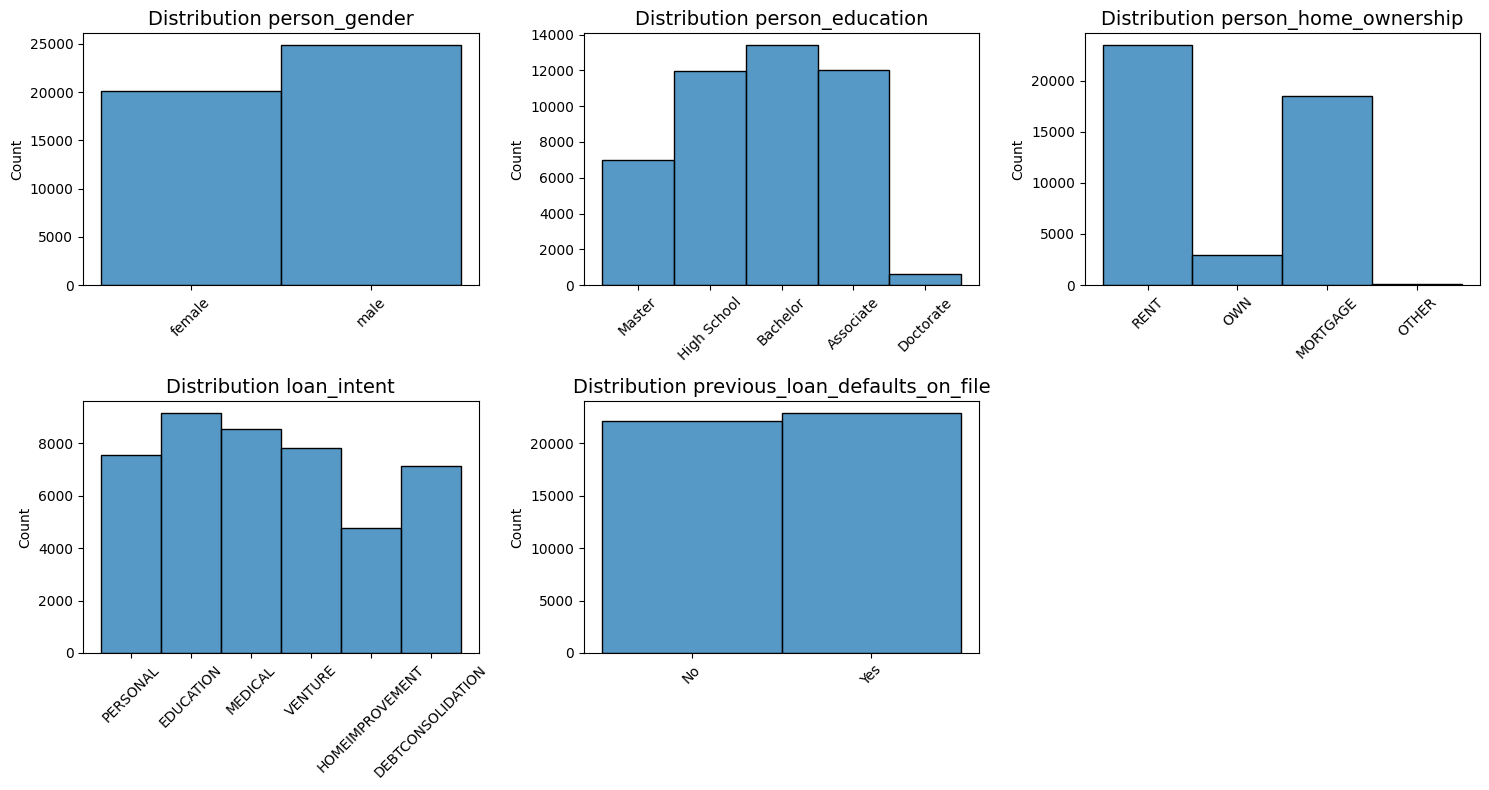

In [8]:
n_cols = 3
n_rows = math.ceil(len(categorial_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Iterate over each categorical column and plot its histogram on a subplot
for i, col in enumerate(categorial_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorial_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [9]:
# Count the number of null (missing) values for each column
null_counts = df.isnull().sum()
print(null_counts)

person_age                        0
person_gender                     0
person_education                  0
person_emp_exp                    0
person_home_ownership             0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
person_income_log                 0
loan_amnt_log                     0
dtype: int64


## Categorical Columns

In [10]:
df['person_gender'].value_counts()
# No specific data cleaning or filtering measures were necessary for this column.

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [11]:
df['person_education'].value_counts()
# No specific data cleaning or filtering measures were necessary for this column.

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [12]:
df['person_home_ownership'].value_counts()
# We replaced the 'OTHER' category with nulls because it had a very small number of values.

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [13]:
df['loan_intent'].value_counts()
# No specific data cleaning or filtering measures were necessary for this column.

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [14]:
df['previous_loan_defaults_on_file'].value_counts()
# No specific data cleaning or filtering measures were necessary for this column.

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

## Numerical Columns

The numerical columns required further processing. Since this is a synthetic dataset, 
some values were unrealistic (e.g., ages over 100).

In [15]:
df['person_age'].describe()
# The synthetic dataset contained unrealistic values (e.g., ages around 140).
# Since the data is concentrated on younger applicants, we are setting an upper bound of 70 years.

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [17]:
df['person_emp_exp'].describe()
# The third quartile (Q3) for this feature is only 8 years, but the data contains
# extreme outliers. A threshold of 40 years is a reasonable cap.

count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64

In [19]:
df['loan_int_rate'].describe()
# No specific data cleaning or filtering measures were necessary for this column.

count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64

In [20]:
df['loan_percent_income'].describe()
# No specific data cleaning or filtering measures were necessary for this column.

count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64

In [21]:
df['cb_person_cred_hist_length'].describe()
# No specific data cleaning or filtering measures were necessary for this column.

count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [22]:
df['credit_score'].describe()
# No specific data cleaning or filtering measures were necessary for this column.

count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64

In [23]:
df['loan_status'].describe()
# No specific data cleaning or filtering measures were necessary for this column.

count    45000.000000
mean         0.222222
std          0.415744
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

## Data Preparation

In [24]:
import pandas as pd
import numpy as np

# Cleans and transforms the raw loan approval data. All decisions
# for filtering and transformation are based on the exploratory analysis
# from the 'data_exploration.ipynb' notebook.

df = pd.read_csv('data/loan_approval/loan_data.csv')

# Log-transform skewed numerical features
df['person_income'] = np.log(df['person_income'])
df['loan_amnt'] = np.log(df['loan_amnt'])

# Map the sparse 'OTHER' category to null
df['person_home_ownership'] = df['person_home_ownership'].replace('OTHER', np.nan)

# Filter out extreme outliers based on EDA findings
df = df[df['person_age'] <= 70]
df = df[df['person_emp_exp'] <= 40]
df = df[df['person_income'] < 14]

# Save the processed data to a new file
df.to_csv('data/loan_approval/loan_data_refined.csv', index=False)